In [13]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd  
import seaborn as seabornInstance 
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
%matplotlib inline
rcParams['figure.figsize'] = 24, 20

# Tip: if you want the generated figure to be large, re-run this cell before the beginning of every exercise.

# 1.Linear Regression

---------------------------------------

## a. Ordinary Linear Regression

------------------

### LinearRegression(fit_intercept = True, normalize = False)
*  Return an ordinary least squares Linear Regression object.
 
* #### Parameters
 1.    fit_intercept: whether to calculate the intercept. True/False. default True
 2.    normalize: whether to normalize the X regressors before fitting. True/False. default False. 
         ignored when fit_intercept is set to be True
     
 
*  #### Attributes (of the LinearRegression object):
 *    coef_: estimated coefficients for the linear regression problem.
 *    intercept_: array of indepentdent term in the linear model.
 
*  #### Methods (on the LinearRegression object)
 *    fit(X, y) : fit the linear model: y = aX + b
 *    get_params: return the parameters for the linear regression estimator.
 *    predict(X): predict using the linear model

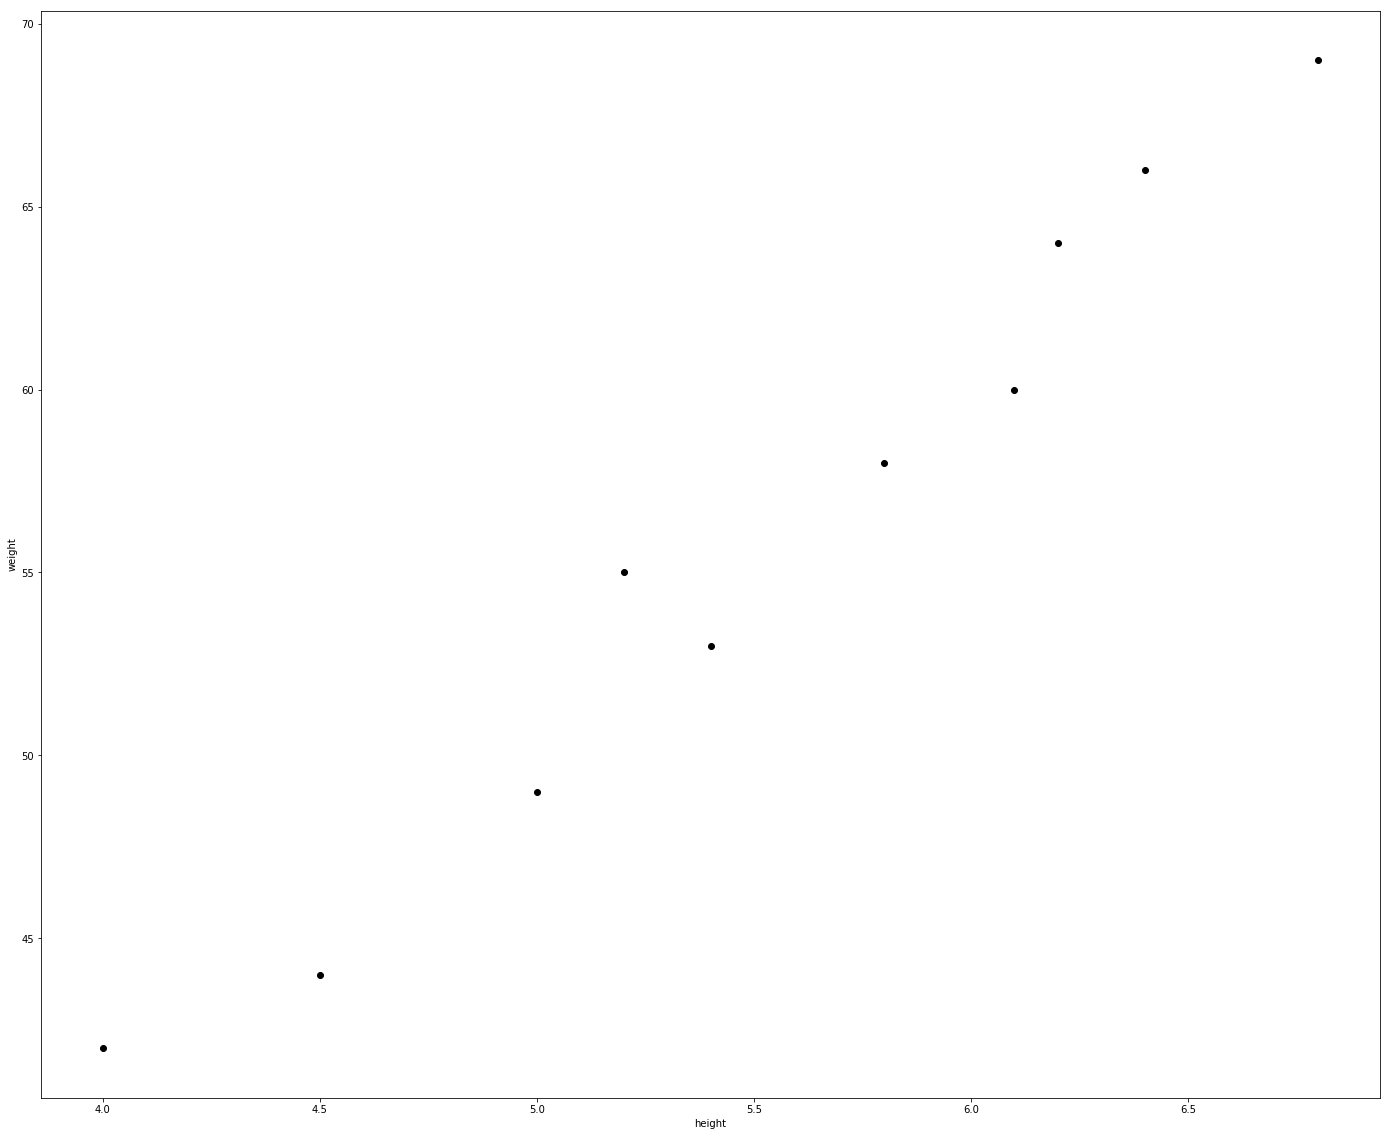

In [14]:
# Example 1: linear regression to estimate the relationship between height and weight

# Data
height=[[4.0],[4.5],[5.0],[5.2],[5.4],[5.8],[6.1],[6.2],[6.4],[6.8]]
weight=[  42 ,  44 , 49, 55  , 53  , 58   , 60  , 64  ,  66 ,  69]

# Visualize the data
plt.scatter(height,weight,color='black')
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

It seems like there is a linear relationship between height and weight. Let us use linear regression to capture such relationship: weight = a * height + b

slope= 10.193621867881548 intercept= -0.4726651480637756


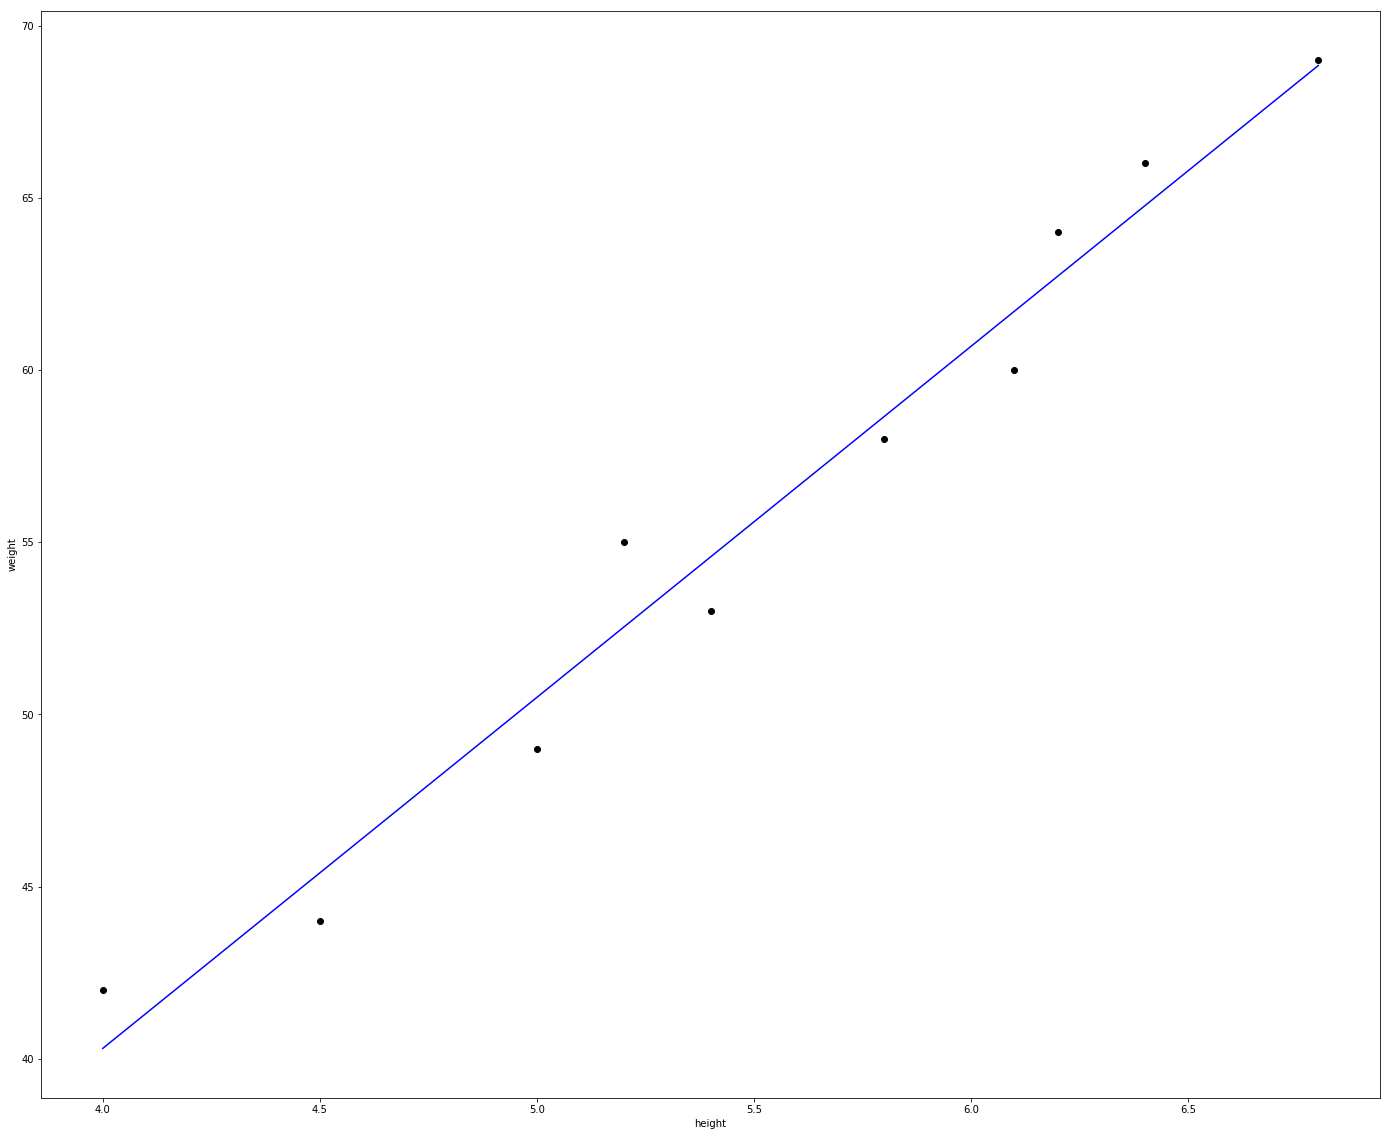

In [15]:
# Example 1: linear regression to estimate the relationship between height and weight (cont)

# Define the Linear Regression object
reg=LinearRegression()

# Fit the Linear Regresison model on our dataset
reg.fit(height,weight)

# Print slope and intercept
a=reg.coef_[0]
b=reg.intercept_
print("slope=",a, "intercept=",b)

# Plot the result
plt.scatter(height,weight,color='black')
predicted_values = [reg.coef_ * i + reg.intercept_ for i in height] #상수에다가 a*x+b 한건데, i 에 height 가 들어감.
plt.plot(height, predicted_values, 'b')
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

We see that weight can be regarded as a linear function of height, so on the other hand, height can also be regarded as a linear function of weight.

slope= 0.09521276595744681 intercept= 0.2080851063829785


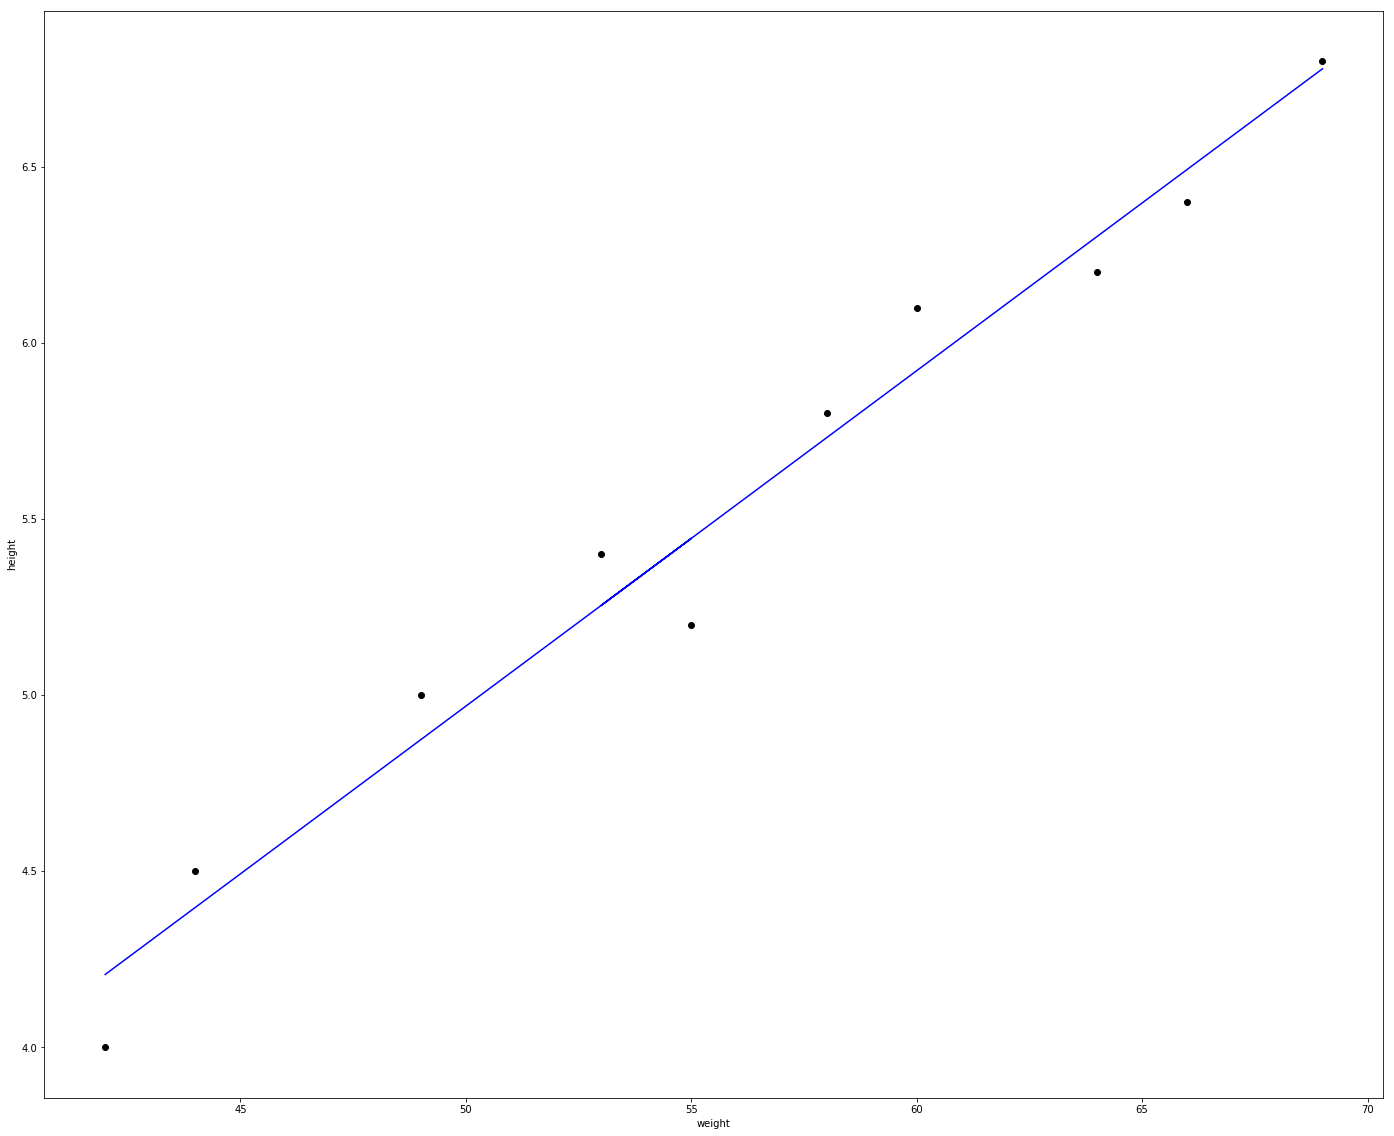

In [16]:
# Exercise 1: linear regression to estimate the relationship between weight and height

# Data
height=[4.0,4.5,5.0,5.2,5.4,5.8,6.1,6.2,6.4,6.8]
weight=[  [42] ,  [44] , [49], [55]  , [53]  , [58]   , [60]  , [64]  ,  [66] ,  [69]]

# Linear Regression
### YOUR CODE HERE. Fill in the "None".
# Hint: Define the Linear Regression object
reg=LinearRegression()

# Hint: Fit the Linear Regresison model on our dataset
reg.fit(weight,height) # weight 와 height 를 바꿔놓음.

# Hint: a is slope and b is intercept
a=reg.coef_[0]
b=reg.intercept_
### END OF YOUR CODE.

print("slope=",a, "intercept=",b)

# Plot the result
plt.scatter(weight,height,color='black')
predicted_values = [reg.coef_ * i + reg.intercept_ for i in weight]
plt.plot(weight, predicted_values, 'b')
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

We have attempted with a (very) simple Linear Regression model, in which there is only 1 feature. However, often in reality, the number of features to consider is often more than that. Let us try with one such example!

In [17]:
# Exercise 2: Multivariate Linear Regression on the diabetes dataset
# Load the diabetes dataset, from 442 diabetes patients
diabetes = datasets.load_diabetes()

# Let us explore about this dataset
# Shape of the dataset
print(diabetes.data.shape)

# Features (information measurements) of those patients
print("The features are: ", diabetes.feature_names)

(442, 10)
The features are:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Question: How many features are there to consider? And how many variables do we need for the Linear Regression model? Why?

Answer: There are 10 features. We need 11 variables (10 variables for the 'coefficients', 1 variable for 'intercept'). The reason we need 'intercept' is based on the plot above, the data is not centered at 0.

Trained coefficients:  [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
Trained intercept:  152.5381335195406


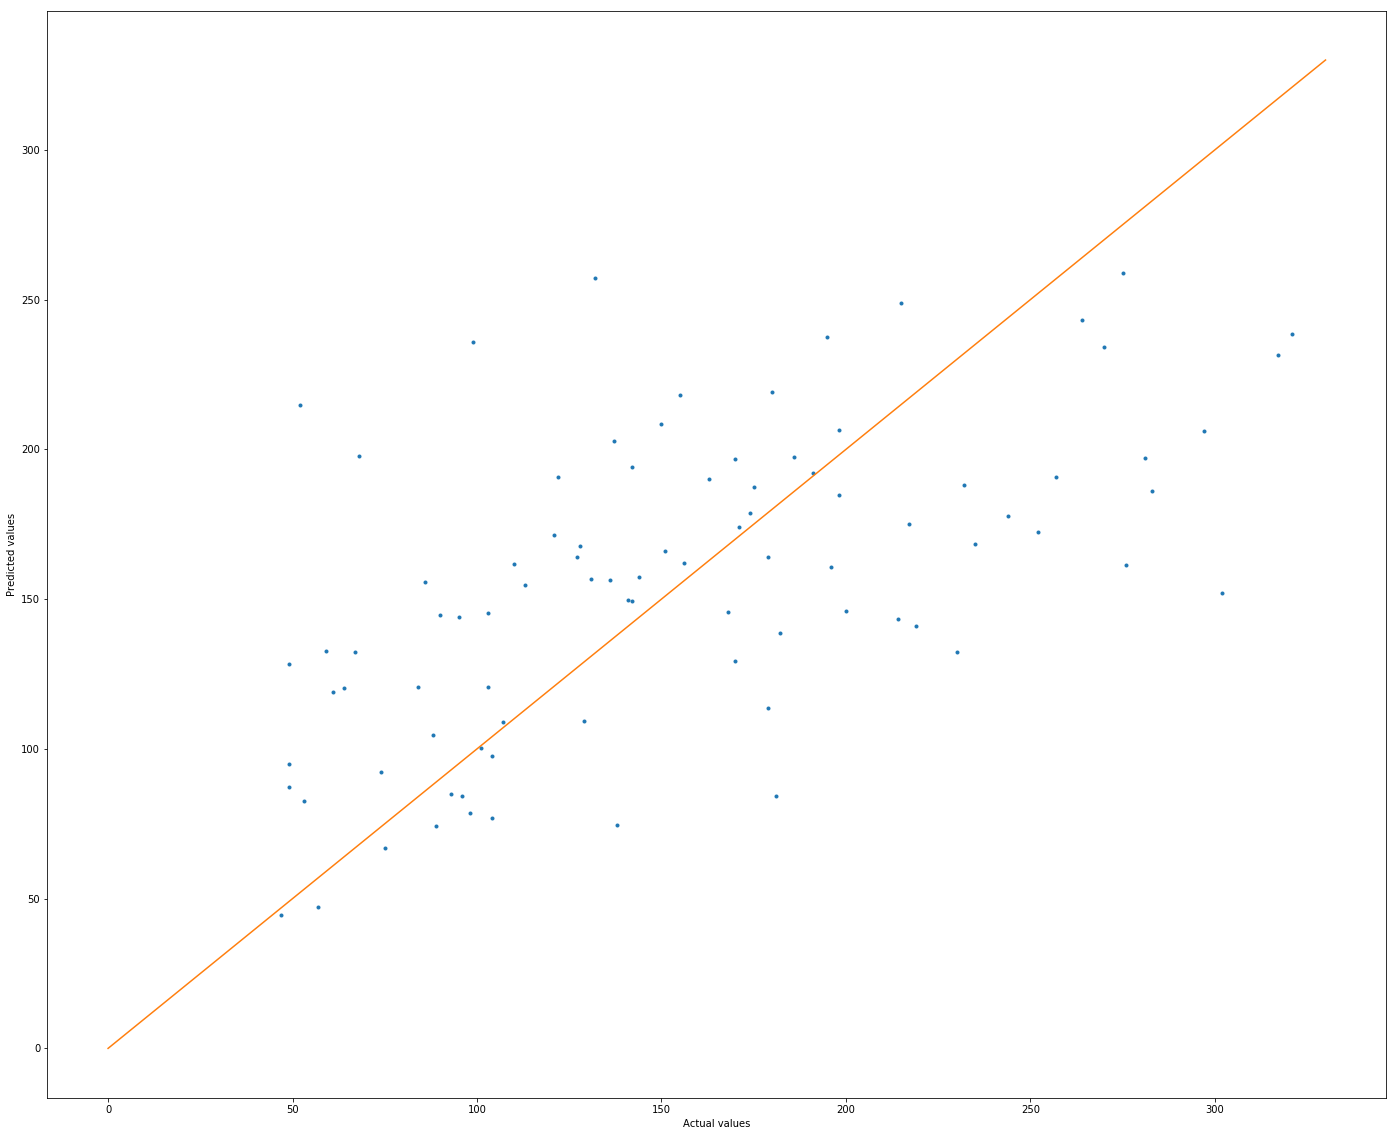

In [18]:
# Exercise 2: Multivariable Linear Regression on the diabetes dataset (cont)

# Split the train and test set (we will see this function shortly)
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# Linear Regression
### YOUR CODE HERE. Fill in the "None".
# Hint: Define the Linear Regression object 'model'
None
# Hint: Fit the model with the Training data
None
# Hint: print the coefficients and the intercept
reg=LinearRegression()
reg.fit(X_train,y_train)

# Hint: Fit the Linear Regresison model on our dataset
None

# Hint: a is slope and b is intercept
a=reg.coef_
b=reg.intercept_
print("Trained coefficients: ", a)
print("Trained intercept: ", b)
# Hint: 'y_pred' should be the predictions on the test set
y_pred =  [np.dot(reg.coef_,  i) + reg.intercept_ for i in X_test]
### END OF YOUR CODE.
# Since the data is 10-dimensional, it is not possible to visualize the actual data. 
# However, we can visualize to compare actual values vs. predicted values
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y) # This is the line x = y, it would be great if our plotted points are near this line.
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [19]:
# Exercise 3: Predicting wine quality based on various factors

# Load the dataset
dataset = pd.read_csv('winequality.csv')

# Let us explore the dataset
print(dataset.shape)
dataset.describe()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We suspect that the wine quality is dependent on other 11 features: fixed acidity, volatile acidity,... alcohol. Let us see if the linear regression model could help.

In [20]:
# Exercise 3: Predicting wine quality based on various factors (cont)

# Clean up the data by removing all null values
dataset = dataset.fillna(method='ffill')

# Devide attributes/features and output vales
# Features
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
# Output values
y = dataset['quality'].values

# Split the train and test set (will see this function shortly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression
### YOUR CODE HERE. Fill in the "None"
# Hint: Define a simple Linear Regression model
reg=LinearRegression()
reg.fit(X_train,y_train)

# Hint: Fit the Linear Regresison model on our dataset
None

# Hint: a is slope and b is intercept
a=reg.coef_
b=reg.intercept_
# Hint: train the model on the train set
None
# Print coefficients associated with 12 features. Hint: the first parameter of the function must be the coefficients
coeff_df = pd.DataFrame(a, dataset.columns[:-1], columns=['Coefficient']) 
### END OF YOUR CODE.

# Show the learned coefficients
coeff_df
#density 가 가장 큰 영향!

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


We can see that 'density' has the most significant negative relationship with 'quality'.

In [21]:
# Exercise 3: Predicting wine quality based on various factors (cont)
# Do prediction on the data.
### YOUR CODE HERE. Fill in the "None".
# Hint: "y_pred" should be the values predicted by the trained Linear Regression model on the test data
y_pred = reg.predict(X_test)
### END OF YOUR CODE

# Compare actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


# 1.Linear Regression

---------------------------------------

## b. Lasso Linear Regression

------------------

### Lasso(alpha = 1.0, fit_intercept = True, normalize = False, max_iter=1000)
*  Return a Lasso L1-regularized least squares Linear Regression object.
 
* #### Parameters
 1.    alpha: constant multiplied with the L1-regularizer term. alpha = 0 is equivalent to ordinary Linear Regression.
 2.    fit_intercept: whether to calculate the intercept. True/False. default True
 3.    normalize: whether to normalize the X regressors before fitting. True/False. default False. 
         ignored when fit_intercept is set to be True
 4.    max_iter: the maximum number of iterations
 
*  #### Attributes (of the LinearRegression object):
 *    coef_: estimated coefficients for the linear regression problem.
 *    intercept_: array of indepentdent term in the linear model.
 
*  #### Methods (on the LinearRegression object)
 *    fit(X, y) : fit the linear model: y = aX + b
 *    get_params: return the parameters for the linear regression estimator.
 *    predict(X): predict using the linear model
 *    set_params: set parameters for this estimator.

Let us go back to the example of height and weight and see how Lasso regularization affects the result.

slope= 7.34624145785877 intercept= 15.301822323462417


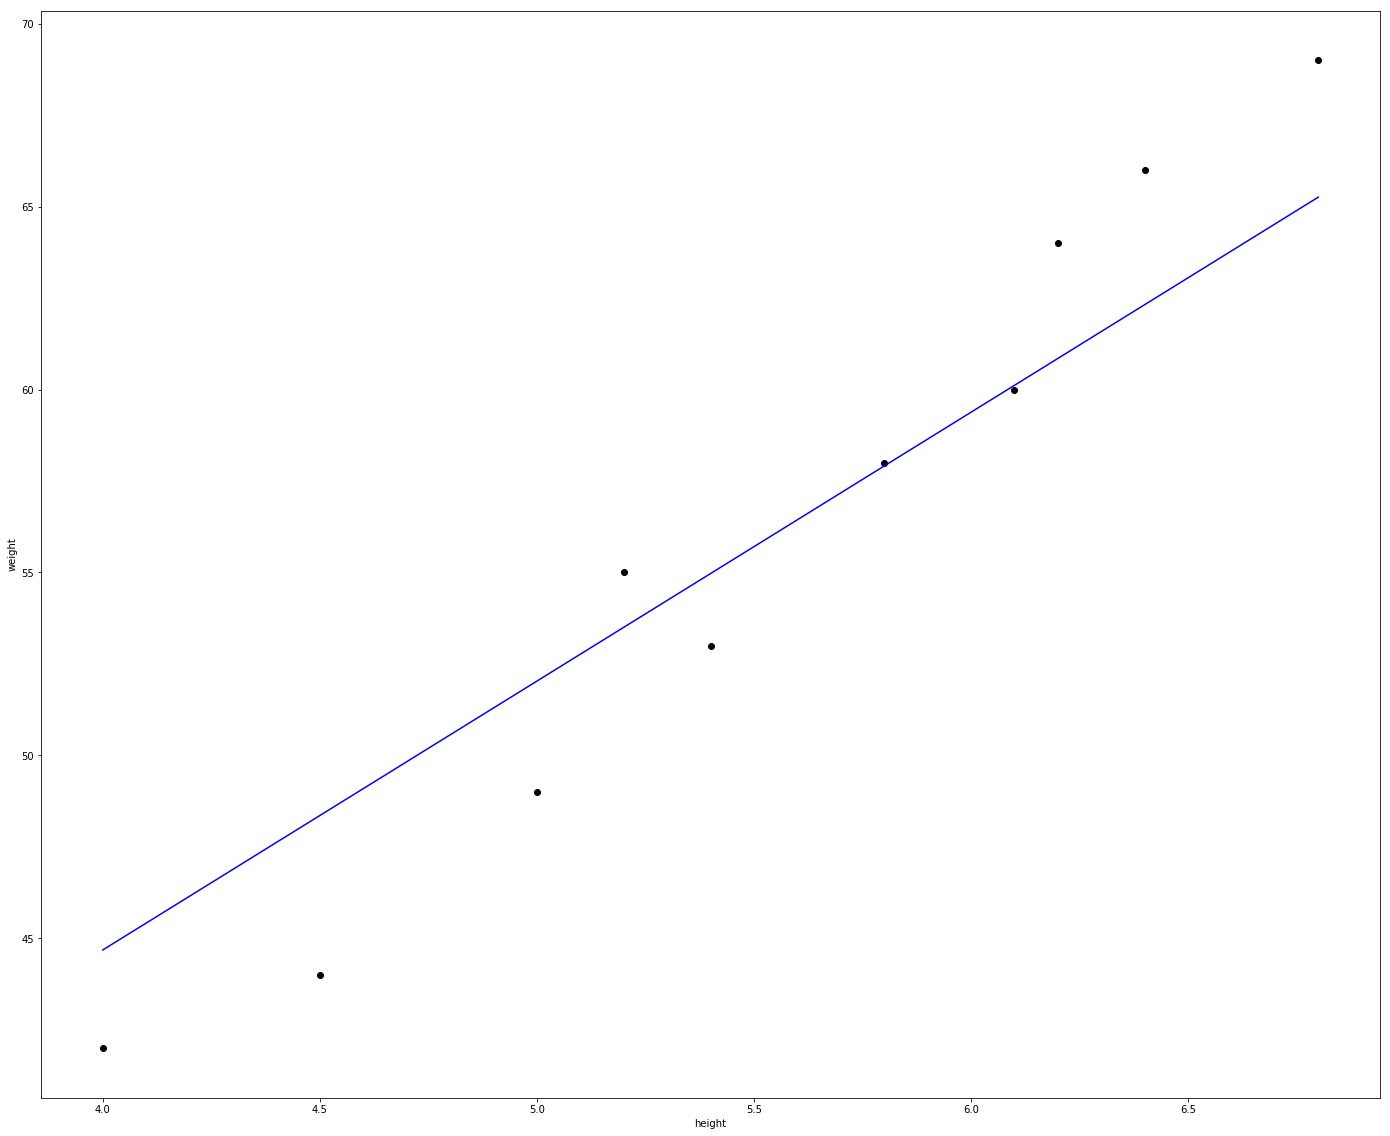

In [29]:
# Example: Predicting relationship between height and weight using Lasso regression
height=[[4.0],[4.5],[5.0],[5.2],[5.4],[5.8],[6.1],[6.2],[6.4],[6.8]]
weight=[  42 ,  44 , 49, 55  , 53  , 58   , 60  , 64  ,  66 ,  69]

# Define the Linear Regression object
reg=Lasso(alpha=2) #Weight L1 Norm 추가되는것! #Norm 이 커지면, 학습이 안됨.. (slope 0, 이게 0 이면 lineaer regression)

# Fit the Lasso Linear Regresison model on our dataset
reg.fit(height,weight)

# Print slope and intercept
a=reg.coef_[0]
b=reg.intercept_
print("slope=",a, "intercept=",b)

# Plot the result
plt.scatter(height,weight,color='black')
predicted_values = [reg.coef_ * i + reg.intercept_ for i in height]
plt.plot(height, predicted_values, 'b')
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

You may notice that the values of slope and intercept are slightly different from that of example in Section 1.a. This is due to the effect of the Lasso regularization term.

Practice: Try different values of alpha to see the effect on the fitted line. Try to find at least 1 value for 'underfitting' and 1 value for 'overfitting'!

In [24]:
# Exercise 1: Ordinary linear regression vs. Lasso linear regression

# Read the data and remove rows with 'NaN' values.
df = pd.read_csv('Hitters.csv').dropna()

y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Some insights into the data
X_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
AtBat      263 non-null float64
Hits       263 non-null float64
HmRun      263 non-null float64
Runs       263 non-null float64
RBI        263 non-null float64
Walks      263 non-null float64
Years      263 non-null float64
CAtBat     263 non-null float64
CHits      263 non-null float64
CHmRun     263 non-null float64
CRuns      263 non-null float64
CRBI       263 non-null float64
CWalks     263 non-null float64
PutOuts    263 non-null float64
Assists    263 non-null float64
Errors     263 non-null float64
dtypes: float64(16)
memory usage: 34.9 KB


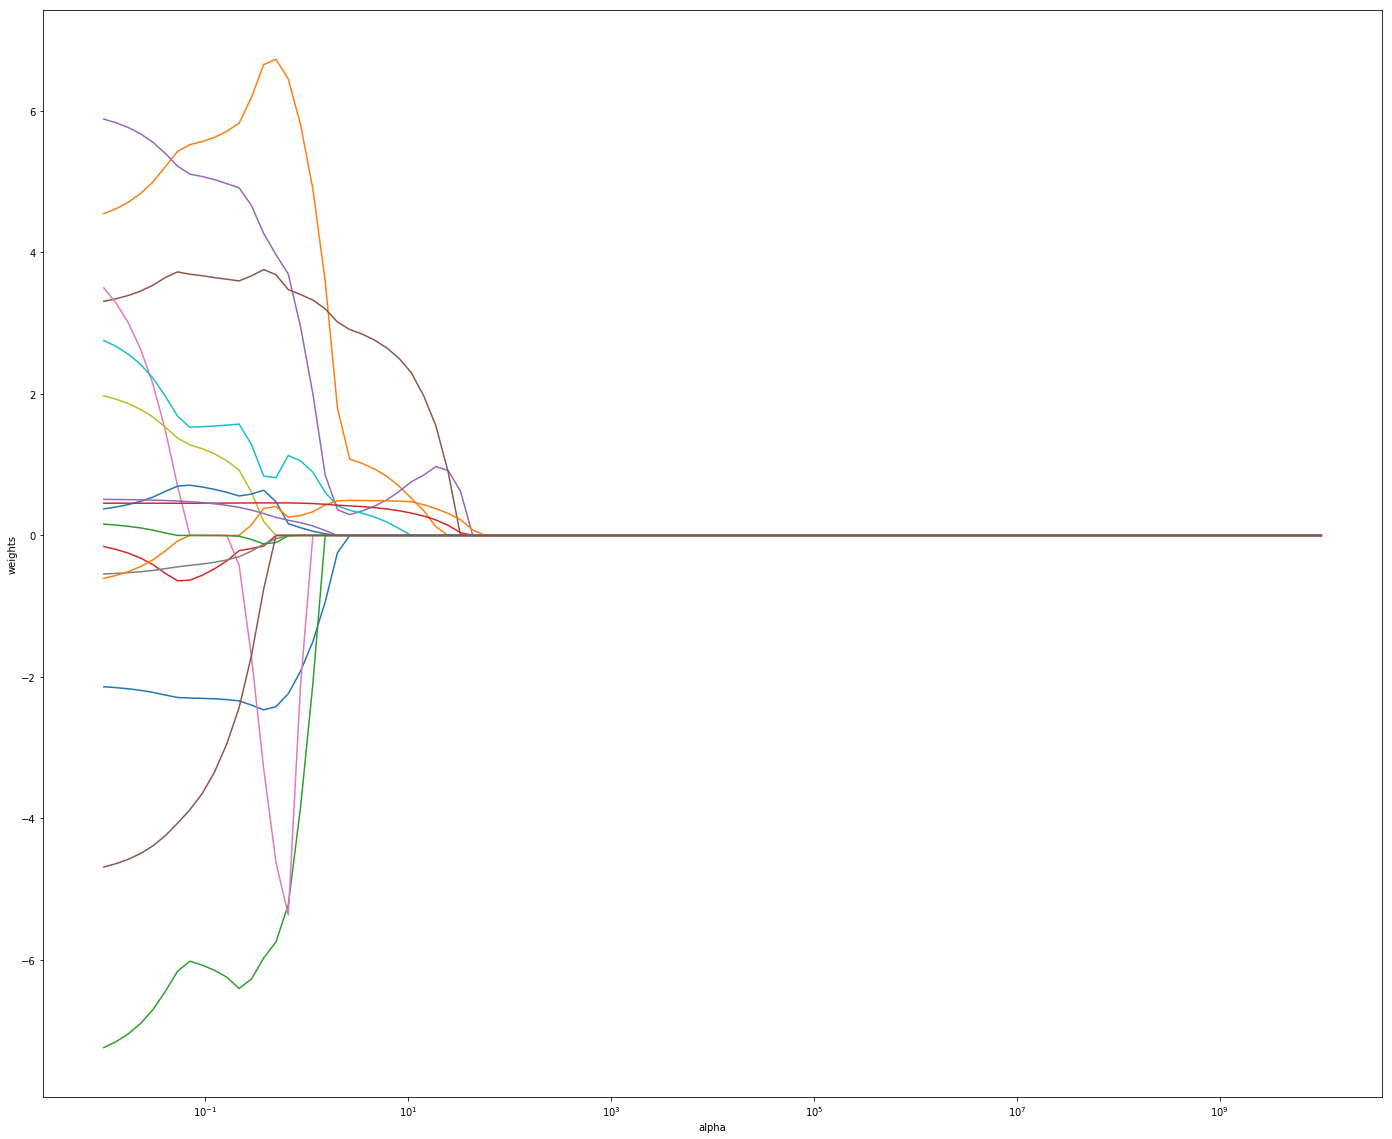

In [30]:
# Exercise 1: Ordinary linear regression vs. Lasso linear regression (cont)

# Split data into training and test sets (will see this function shortly)
X_train, X_test , y_train, y_test = train_test_split(X_, y, test_size=0.5, random_state=1)

# Range of regularization weight alpha:
alphas = 10**np.linspace(10,-2,100)*0.5

# Lasso regression with different values for 'alpha'
### YOUR CODE HERE. Fill in the "None".
# Hint: define 'lasso' as a Lasso Linear Regression object with maximum 10000 iterations, AND normalization.
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:    # Iterate through all values in 'alphas'
    # Hint: set our Lasso Linear Regression model to have weight of regularization equal to a
    lasso.set_params(alpha=a)
    # Hint: fit our model to the data.
    lasso.fit(X_train, y_train)
    # Hint: append the learned variables into our list 'coefs'
    coefs.append(lasso.coef_)
### END OF YOUR CODE.

#print(coefs)
# Plot the weight learned with different values of alphas
# 0에 먼저 수렴하는 게 안 중요한 것. L1 은 빠르게 weight 를 0으로 감소시키는 경향이 있음. 중요한것만 추출해서 쓸수 있음.
plt.plot(alphas*2, coefs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [32]:
# Exercise 1: Ordinary linear regression vs. Lasso linear regression (cont)

# Choose a 'good' value for alpha. You will see how we can find this value shortly.
best_alpha = 2.2410206769492604 #마지막에 어떻게 찾았는지 알려줄 것.

# Let us apply the 'best_alpha' on our Lasso Linear Regression model
### YOUR CODE HERE. Fill in the "None".
# Hint: set this value for 'alpha' in our previously defined Lasso Linear Regression object.
lasso.set_params(alpha=best_alpha)
# Hint: train the model on the training data
lasso.fit(X_train, y_train)
# Hint: predict values for the test data
y_pred = lasso.predict(X_test)
### END OF YOUR CODE.


# Compute Mean-squarred-error:
print("Error of Lasso regression with alpha value " + str(best_alpha) + " is:  " + str(mean_squared_error(y_test, y_pred)))

# Let us compare this result with Ordinary Lasso Linear Regression model
# YOUR CODE HERE. Fill in the "None"
# Hint: how to define an ordinary linear regression model with normalization?
ordinary = LinearRegression(normalize = True)
# Hint: train the model on training data
ordinary.fit(X_train, y_train)             # Fit a ridge regression on the training data
# Hint: use the trained model to predict the value for test data
y_pred = ordinary.predict(X_test)            # Use this model to predict the test data
## END OF YOUR CODE.
# Compute Mean-squarred-error:
print("Error of ordinary linear regression is:  " + str(mean_squared_error(y_test, y_pred))) # lasso 의 정규화로 에러가 줄어듦.

Error of Lasso regression with alpha value 2.2410206769492604 is:  111160.39367053009
Error of ordinary linear regression is:  120478.0083988313


Question: Which model worked better here?

Answer: Clearly Lasso model, with a carefully chosen alpha, resulting in a lower Mean-squarred Error.


Question: What is one of the most significant characteristics of Lasso linear regression?

Answer: "least absolute shrinkage and selection operator". Sparsity ~ many learned variables have value ZERO. 
Let us see if this is indeed the case.

In [46]:
# YOUR CODE HERE. Fill in the "None".
# Hint: the first parameter must the learned coefficients of the model.
pd.Series(lasso.coef_, index=X_.columns)
### END OF YOUR CODE.

AtBat     NaN
Hits      NaN
HmRun     NaN
Runs      NaN
RBI       NaN
Walks     NaN
Years     NaN
CAtBat    NaN
CHits     NaN
CHmRun    NaN
CRuns     NaN
CRBI      NaN
CWalks    NaN
PutOuts   NaN
Assists   NaN
Errors    NaN
dtype: float64

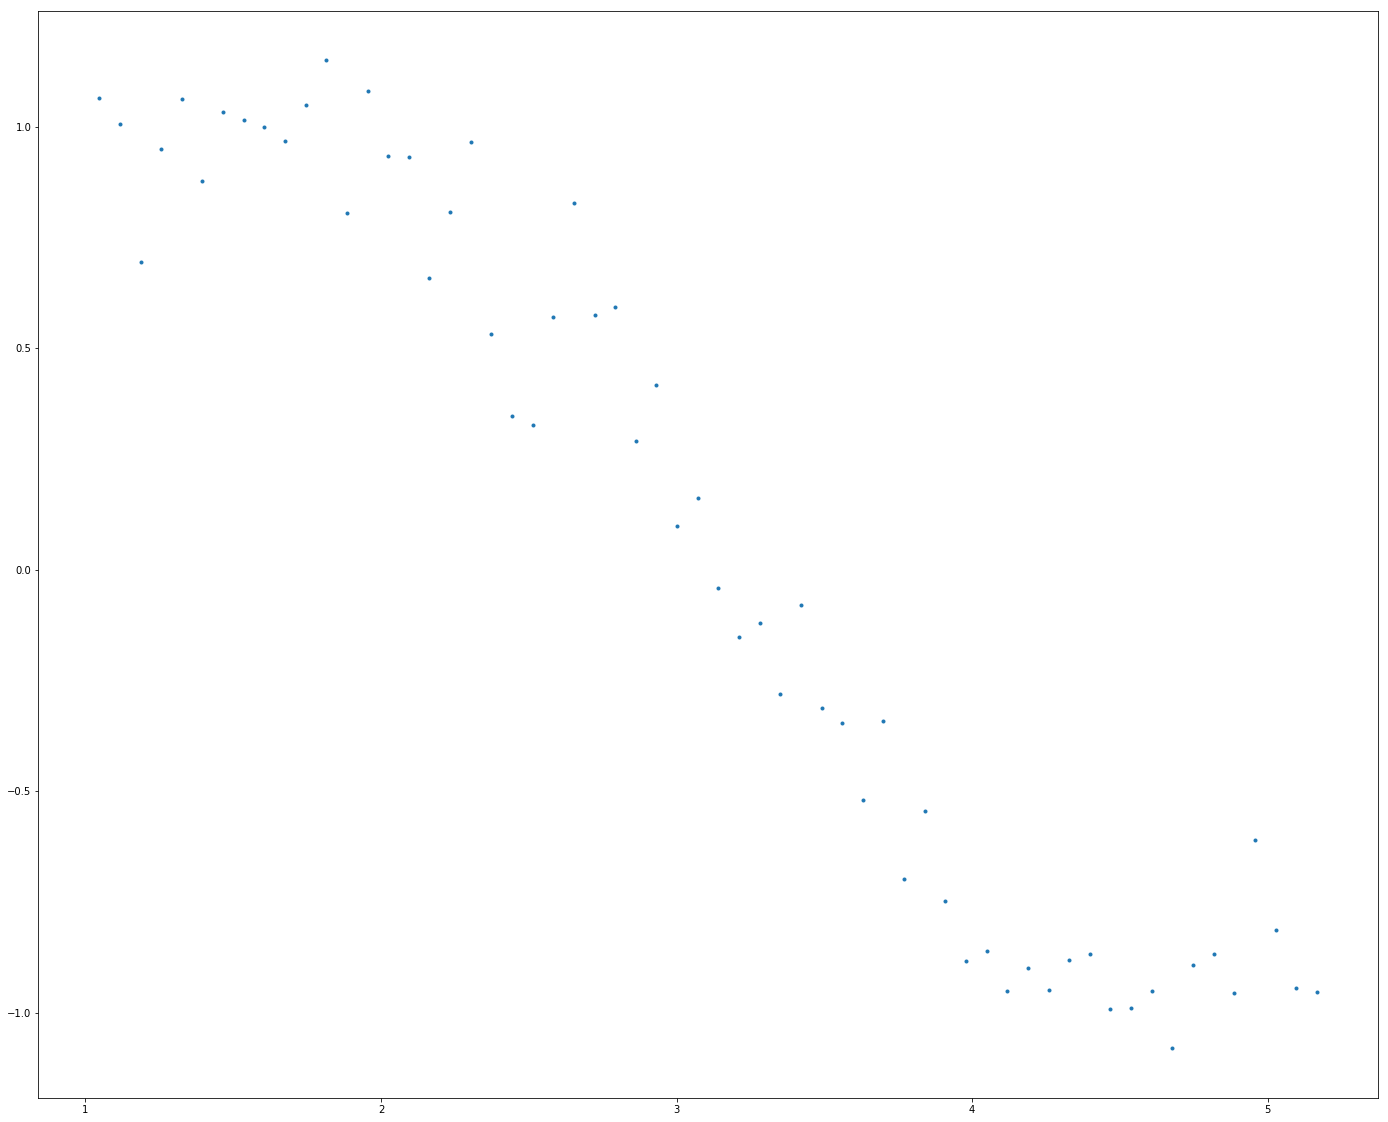

In [47]:
# Exercise 2: Effect of regularization weight on capacity of Lasso linear regression model.

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

This is the curve of a sine wave, but with noise. Let us try to approximate this curve by Lasso polynomial regression.

In [48]:
# Exercise 2: Effect of regularization weight on capacity of Lasso linear regression model (cont)

# Construct the 'features', which are just powers of the x-component
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print (data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [51]:
# Exercise 2: Effect of regularization weight on capacity of Lasso linear regression model (cont)

# Define a helper function here, with Lasso regression and plot
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    ### YOUR CODE HERE. Fill in the None. 
    # NOTE: at this stage, I expect the students to be familiar with the 3-step process
    # define Lasso object -->> fit (to train) --> predict (to predict value)
    # Hint: parameter alpha is the weight of regularization; we use normalization, maximum 100000 iterations. 
    # Hint: training data is (data[predictors], data['y']). 'y_pred' is predicted value when applying the model on data[predictors]
    lassoreg = None
    None
    y_pred = None
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5, tol=0.01)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    # Hint: learned intercept of the model
    ### END OF YOUR CODE.
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    # Hint: learned intercept of the model
    ret.extend([lassoreg.intercept_])
    # Hint: learned coefficients of the model
    ret.extend(lassoreg.coef_)

    return ret

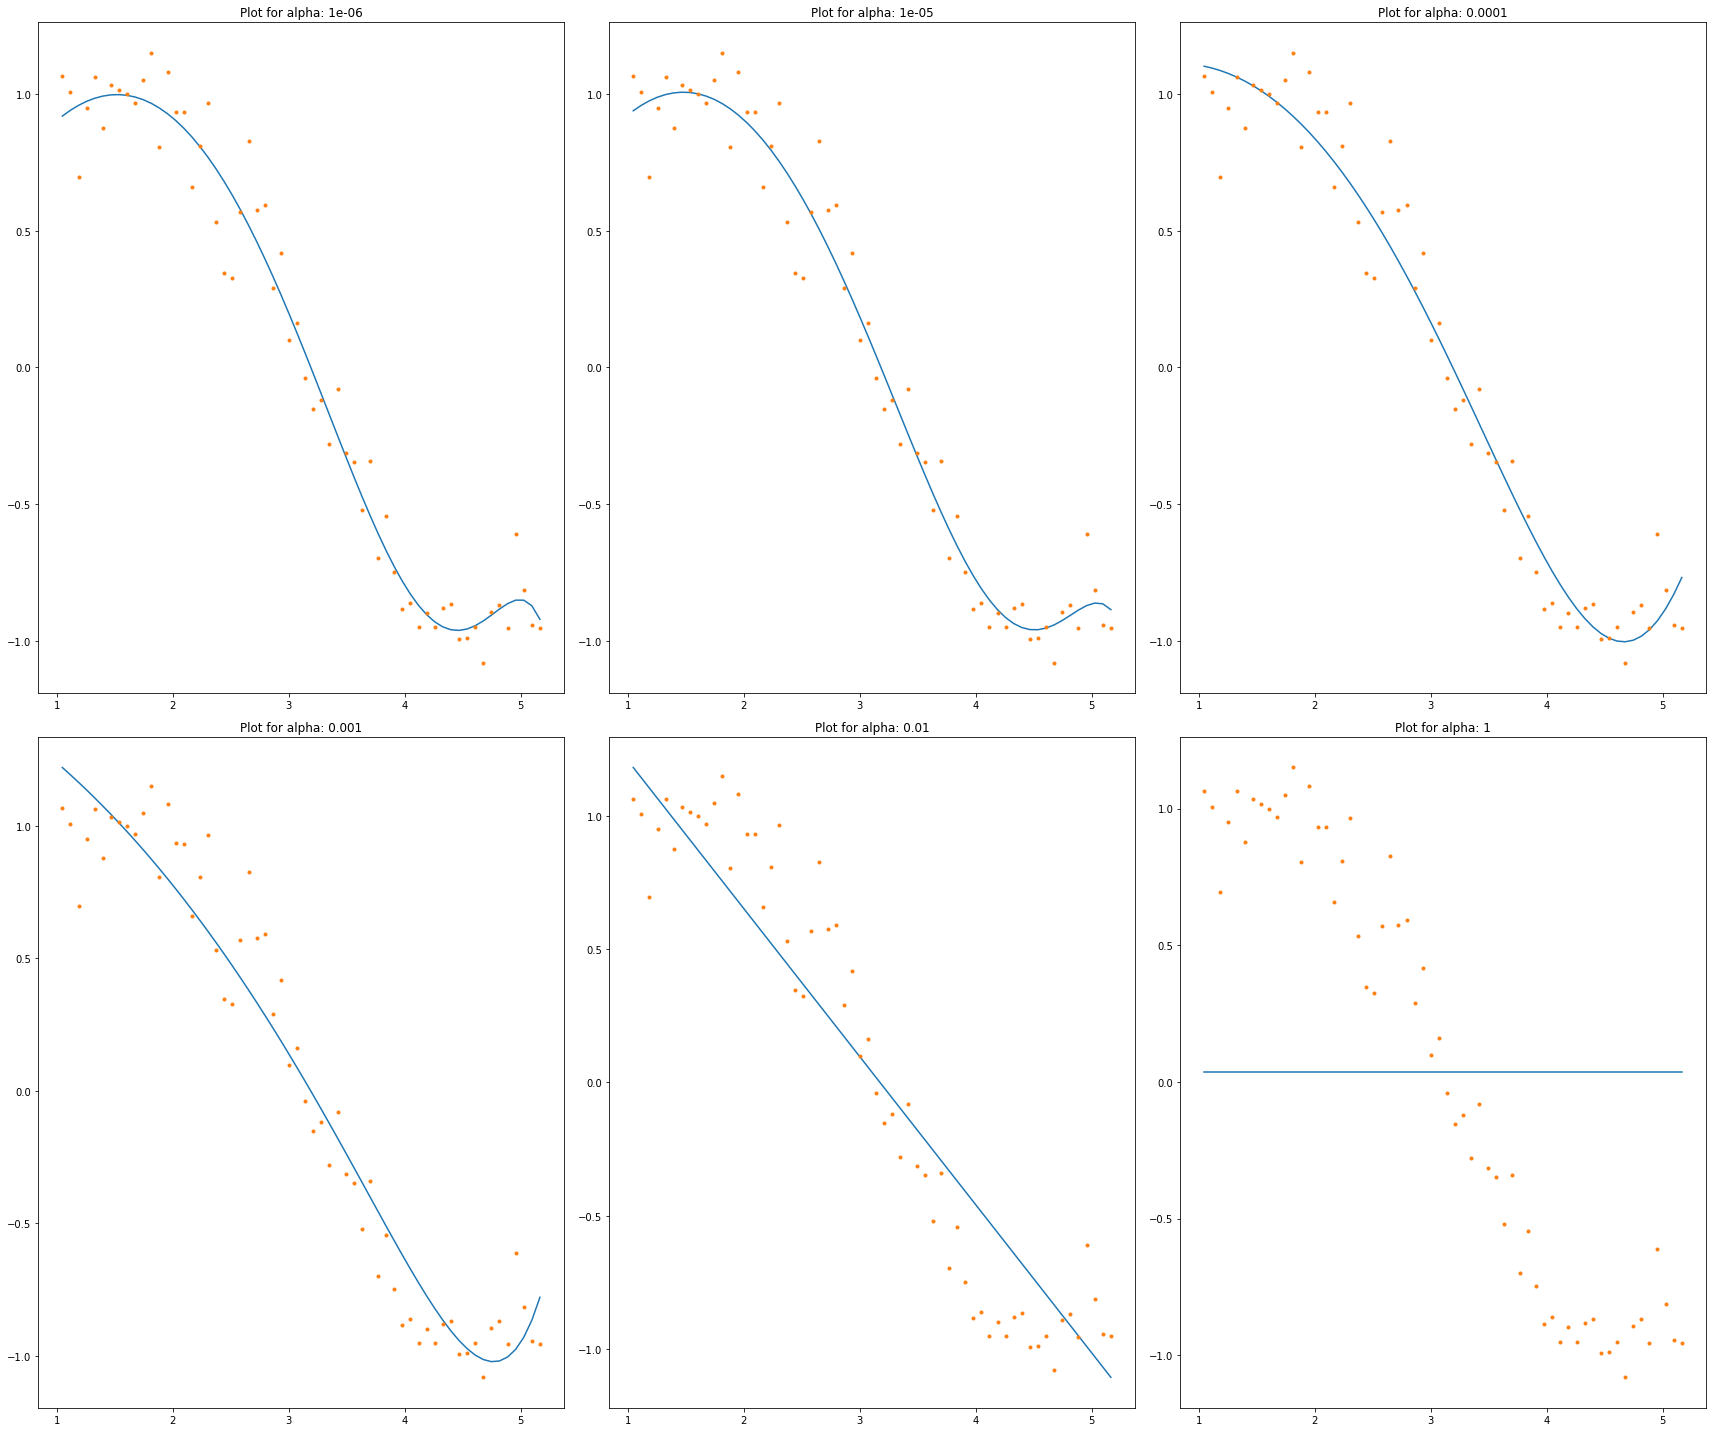

In [52]:
# Exercise 2: Effect of regularization weight on capacity of Lasso linear regression model (cont)

#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-6:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)
    
plt.show()

Observe how different values of 'alpha' can lead to different capacity of the Lasso Linear Regression model.

Question: can you see what happened for the plot for each of the six values of alpha?

Answer: overfitting, overfitting, (slightly) overfitting, normal, underfitting, underfitting, respectively.

In [53]:
# Exercise 2: Effect of regularization weight on capacity of Lasso linear regression model (cont)
# Print the trained variables 
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-06,0.964781,0.248155,0.924816,-0.243249,-0.0251592,-0.00141872,9.96634e-05,7.76735e-05,1.8469e-05,3.48988e-06,5.62855e-07,7.56621e-08,6.98632e-09,1.95872e-10,-2.80914e-10,-1.25254e-10,-3.47346e-11
alpha_1e-05,0.978394,0.25157,0.97713,-0.28302,-0.0222008,-0.000322868,0.000204696,8.71358e-05,1.66058e-05,2.65469e-06,3.63298e-07,3.90393e-08,1.70119e-09,0,-1.98447e-10,-8.84045e-11,-2.21833e-11
alpha_0.0001,1.2878,0.999873,0.268535,-0.150048,-0.0126754,-5.54927e-05,0,2.85818e-05,9.89713e-06,1.51977e-06,1.97952e-07,1.93401e-08,3.26316e-10,0,-0,-0,-9.11461e-12
alpha_0.001,1.87245,1.54619,-0.238848,-0.0658164,-0.00371591,-0,-0,0,0,0,0,2.40422e-08,4.75138e-09,6.65578e-10,8.55275e-11,9.31046e-12,6.05659e-13
alpha_0.01,3.63858,1.76388,-0.555353,-4.87174e-05,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_0.1,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_1,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_20,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


Question: what can you see here regarding the tendency of the learned variables when alpha increases from 1e-15 to 10?

Answer: more regularization, more sparsity.

# 1.Linear Regression

---------------------------------------

## c. Ridge Linear Regression

------------------

### Ridge(alpha = 1.0, fit_intercept = True, normalize = False, max_iter=None)
*  Return a Ridge L2-regularized least squares Linear Regression object.
 
* #### Parameters
 1.    alpha: constant multiplied with the L1-regularizer term. alpha = 0 is equivalent to ordinary Linear Regression.
 2.    fit_intercept: whether to calculate the intercept. True/False. default True
 3.    normalize: whether to normalize the X regressors before fitting. True/False. default False. 
         ignored when fit_intercept is set to be True
 4.    max_iter: the maximum number of iterations
 
*  #### Attributes (of the LinearRegression object):
 *    coef_: estimated coefficients for the linear regression problem.
 *    intercept_: array of indepentdent term in the linear model.
 
*  #### Methods (on the LinearRegression object)
 *    fit(X, y) : fit the linear model: y = aX + b
 *    get_params: return the parameters for the linear regression estimator.
 *    predict(X): predict using the linear model
 *    set_params: set parameters for this estimator.


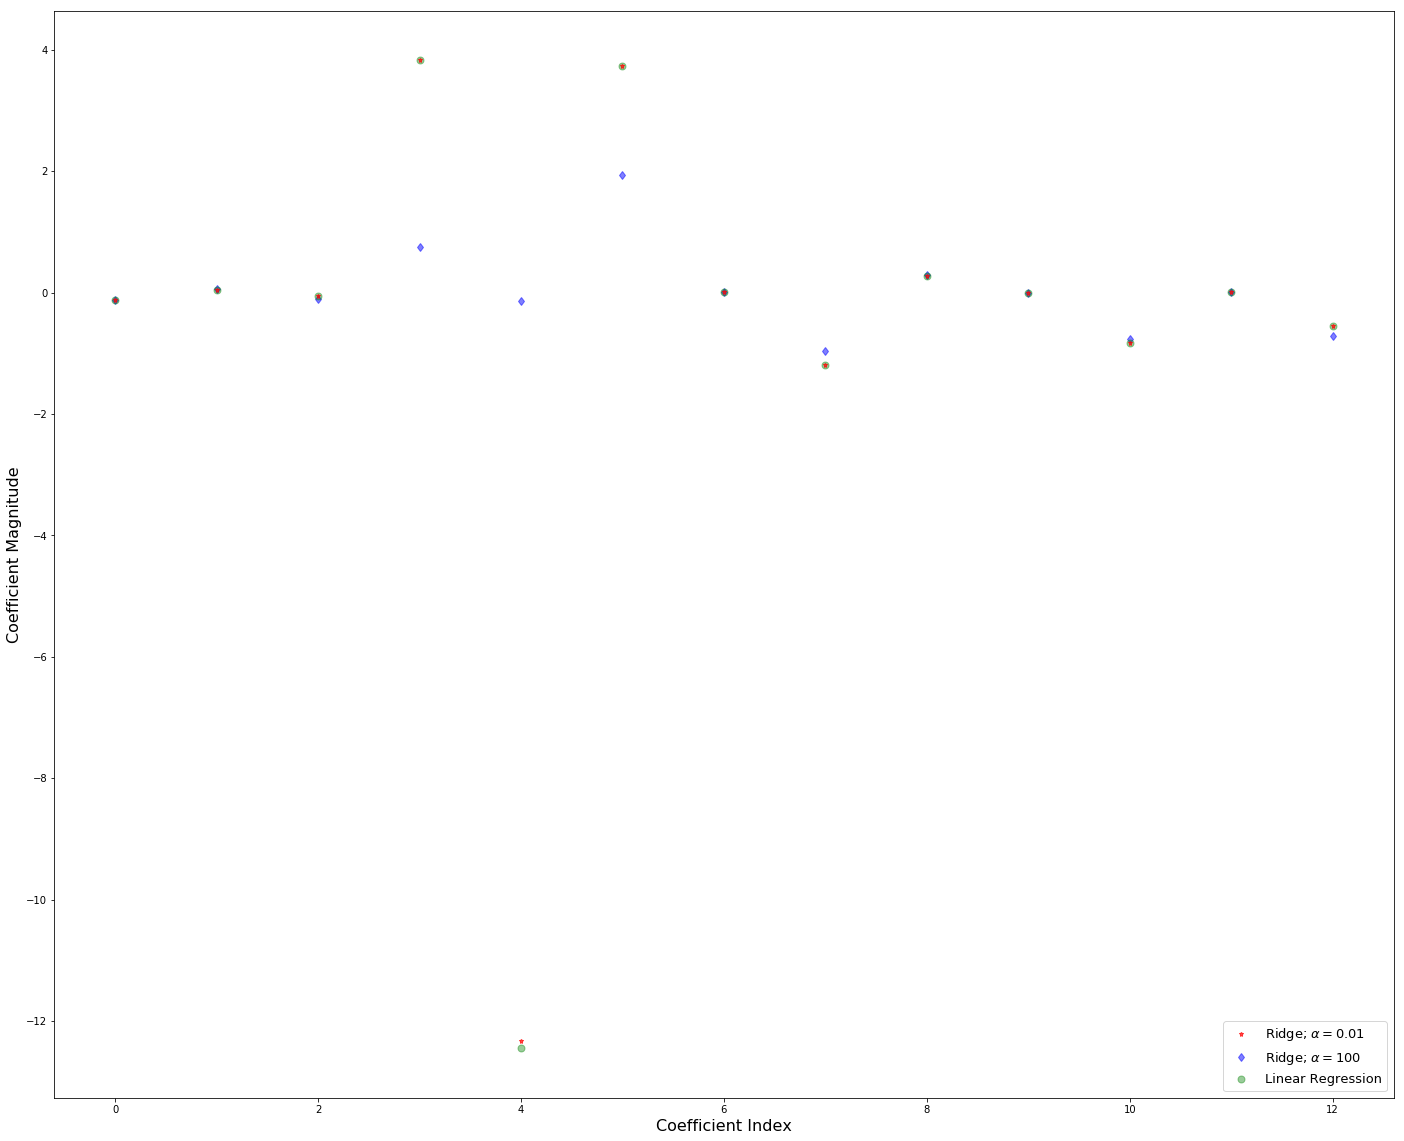

In [54]:
# Exercise 1: Ridge Linear Regression to predict price of Boston houses.

# Note: since the syntax is very similar to Lasso regression, there is no example for this section.

# Load the dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
newX=boston_df.drop('Price',axis=1)

#print (newX[0:3]) # check 
newY=boston_df['Price']
#print type(newY)# pandas core frame

# Split the train and test sets
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
#print (len(X_test), len(y_test))

# Ordinary Linear Regression
### YOUR CODE HERE. Fill in the "None". 2 lines of code.
# Hint: define an Ordinary Linear Regression object 'lr' and train it on the training data
lr = LinearRegression()
lr.fit(X_train, y_train)
### END OF YOUR CODE.

# Ridge Linear Regression
### YOUR CODE HERE. Fill in the "None". 4 lines of code.
#2 lines of code.
# Hint: define a Ridge Linear Regression object 'rr' with regularization weight 0.01, and train it on the training data.
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

# 2 lines of code.
# Hint: define a Ridge Linear Regression object with regularization weight 100 'rr100', and train it on the training data.
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

# Plot to see the difference of regularization weights in terms of learned variables.
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

It is clear than with alpha = 0.01 (small weight), there is almost no difference between Ridge and Ordinary Linear Regression. On the other hand, as alpha = 100 is quite large, the learned variables of Ridge are considerably different from that of ordinary linear regression.

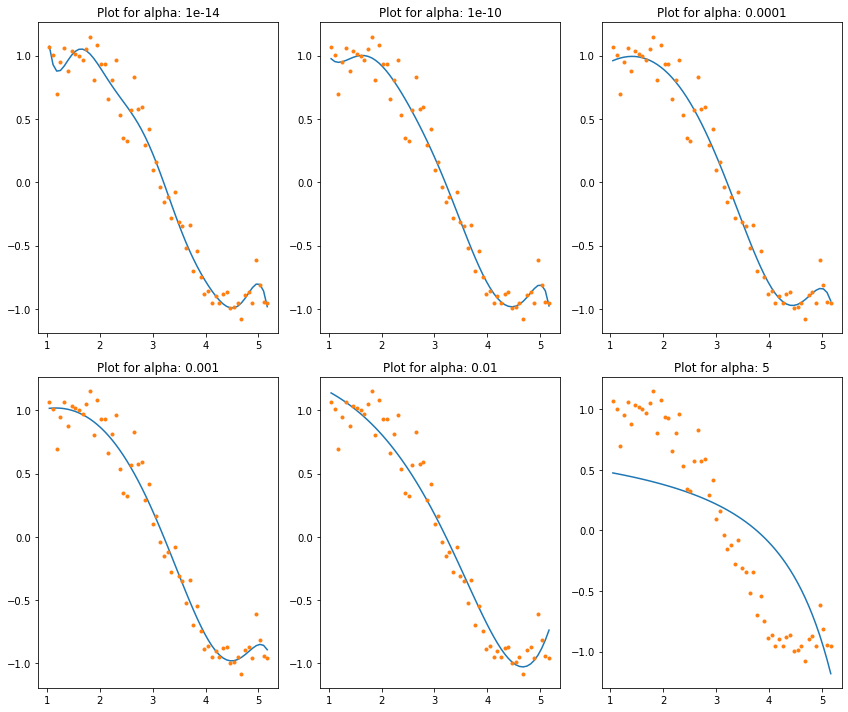

In [298]:
# Exercise 2: Effect of regularization weights on fitting capacity of the model.
# Define a helper function with Ridge Linear Regression with plotting
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    ### YOUR CODE HERE. Fill in the "None".
    # NOTE: at this stage, I expect the students to be familiar with the 3-step process
    # define Ridge object -->> fit (to train) --> predict (to predict value)
    # Hint: parameter alpha is the weight of regularization; we use normalization, maximum 100000 iterations. 
    # Hint: training data is (data[predictors], data['y']). 'y_pred' is predicted value when applying the model on data[predictors]
    ridgereg = None
    None
    y_pred = None
    
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    # Hint: learned intercept of the model
    ret.extend([None])
    # Hint: learned coefficients of the model
    ret.extend(None)
    return ret
    
    ### END OF YOUR CODE.

#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-14, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-14:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)
    
plt.show()

Question: can you see the effect of regularization weight on the fitting capacity of the curve?

Answer: over-fitting, over-fitting, over-fitting, over-fitting, normal, under-fitting.

In Section 1.b, we compared Lasso with ordinary Linear Regression. Let us also consider Ridge regression for that problem!

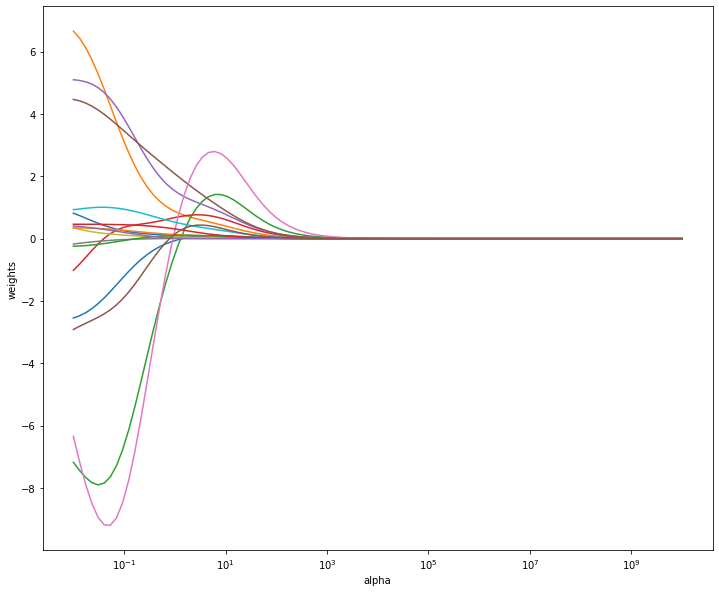

In [299]:
# Exercise 3: Ridge Regression vs. Ordinary Regression

# RELOAD EVERYTHING
df = pd.read_csv('Hitters.csv').dropna()

y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Split data into training and test sets (will see this function shortly)
X_train, X_test , y_train, y_test = train_test_split(X_, y, test_size=0.5, random_state=1)

# Range of regularization weight alpha:
alphas = 10**np.linspace(10,-2,100)*0.5

# Ridge regression with different values for 'alpha'
### YOUR CODE HERE. Fill in the "None".
# Hint: define 'ridge' as a Ridge Linear Regression object with maximum 10000 iterations, AND normalization.
ridge = None
coefs = []

for a in alphas:    # Iterate through all values in 'alphas'
    # Hint: set our Ridge Linear Regression model to have weight of regularization equal to a
    None
    # Hint: fit our model to the data.
    None
    # Hint: append the learned variables into our list 'coefs'
    None
### END OF YOUR CODE.

# Plot the weight learned with different values of alphas
plt.plot(alphas*2, coefs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [300]:
# Exercise 3: Ridge Regression vs. Ordinary Regression

# Choose a 'good' value for alpha. You will see how this value is found shortly.
best_alpha = 0.5748784976988678

# Let us apply the 'best_alpha' on our Ridge Linear Regression model
### YOUR CODE HERE. Fill in the "None".
# Hint: set this value for 'alpha' in our previously defined Ridge Linear Regression object.
None
# Hint: train the model on the training data
None
# Hint: predict values for the test data
None
### END OF YOUR CODE.

# Compute Mean-squarred-error:
print("Error of Ridge regression with alpha value " + str(best_alpha) + " is:  " + str(mean_squared_error(y_test, y_pred)))

# Let us compare this result with Ordinary Lasso Linear Regression model
# YOUR CODE HERE. Fill in the "None"
# Hint: how to define an ordinary linear regression model using Ridge()?
ordinary = None
# Hint: train the model on training data
None
# Hint: 'y_pred' should be the predicted values on the test data
y_pred = None
## END OF YOUR CODE.

# Compute Mean-squarred-error:
print("Error of ordinary linear regression is:  " + str(mean_squared_error(y_test, y_pred)))

Error of Ridge regression with alpha value 0.5748784976988678 is:  104628.72833197896
Error of ordinary linear regression is:  120478.00839881244


Question: Comment on the performance of Ridge and ordinary linear regression?

Answer: clearly Ridge regression, with a carefully chosen value of alpha, performed better in terms of mean-squarred error.

REFERENCES:
    1. https://scikit-learn.org/stable/modules/linear_model.html
    2. https://dzone.com/articles/linear-regression-using-python-scikit-learn
    3. https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial
    4. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
    5. https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
    6. https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
    7. http://www.science.smith.edu/~jcrouser/SDS293/labs/lab9-py.html
    8. https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Thank you for all of your hard work! That is the end of the Linear Regression tutorials. See you after the break!